In [ ]:
 pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=5f76f2ff28f34e4d69086eb2bf30d13a8a2e861e2d2aba08f93abea5b5f45b0d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


# Mục mới

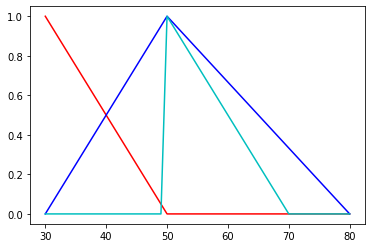

In [ ]:
from skfuzzy.filters.fire import trimf
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow = fuzz.trimf(x,[30,30,50]) 
y=np.arange(30,81,1)
medium_fast = fuzz.trimf(y,[30,50,80])
z=np.arange(30,81,1)
full_speed = fuzz.trimf(z,[50,50,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(y,medium_fast,'b',linewidth=1.5,label='medium_fast')
plt.plot(z,full_speed,'c',linewidth=1.5,label='full_speed')



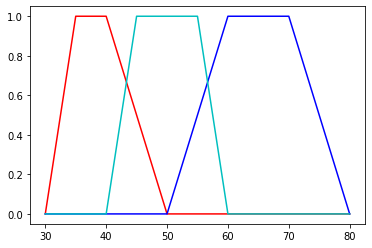

In [ ]:
from skfuzzy.filters.fire import trimf
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow = fuzz.trapmf(x,[30,35,40,50]) 
y=np.arange(30,81,1)
medium_fast = fuzz.trapmf(y,[50,60,70,80])
z=np.arange(30,81,1)
full_speed = fuzz.trapmf(z,[40,45,55,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(y,medium_fast,'b',linewidth=1.5,label='medium_fast')
plt.plot(z,full_speed,'c',linewidth=1.5,label='full_speed')


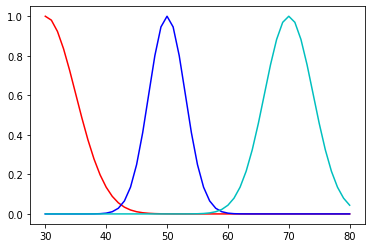

In [ ]:
from skfuzzy.filters.fire import trimf
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow = fuzz.gaussmf(x,30,5) 
y=np.arange(30,81,1)
medium_fast = fuzz.gaussmf(y,50,3)
z=np.arange(30,81,1)
full_speed = fuzz.gaussmf(z,70,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot(y,medium_fast,'b',linewidth=1.5,label='medium_fast')
plt.plot(z,full_speed,'c',linewidth=1.5,label='full_speed')


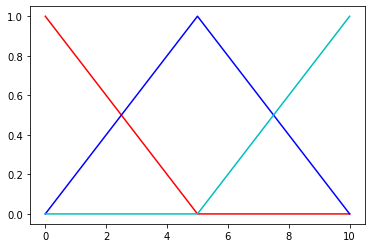

In [ ]:
from numpy.ma.extras import average
from skfuzzy.filters.fire import trimf
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
x=np.arange(0,10.1,1)
poor = fuzz.trimf(x,[0,0,5]) 
y=np.arange(0,10.1,1)
average = fuzz.trimf(y,[0,5,10])
z=np.arange(0,10.1,1)
good = fuzz.trimf(z,[5,10,10])
plt.figure()
plt.plot(x,poor,'r',linewidth=1.5,label='slow')
plt.plot(y,average,'b',linewidth=1.5,label='medium_fast')
plt.plot(z,good,'c',linewidth=1.5,label='full_speed')



25.515706032513773


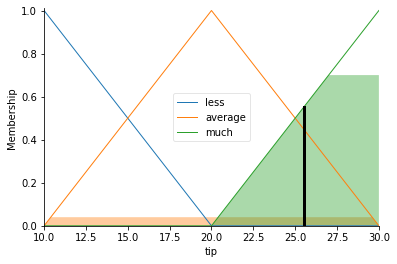

In [ ]:
from skfuzzy.filters.fire import trimf
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']= fuzz.trimf (food.universe,[0,0,5])
food['average']= fuzz.trimf (food.universe,[0,5,10])
food['good']= fuzz.trimf (food.universe,[5,10,10])

service['poor']= fuzz.trimf (service.universe,[0,0,5])
service['average']= fuzz.trimf (service.universe,[0,5,10])
service['good']= fuzz.trimf (service.universe,[5,10,10])

tip['less']= fuzz.trimf (tip.universe,[10,10,20])
tip['average']= fuzz.trimf (tip.universe,[10,20,30])
tip['much']= fuzz.trimf (tip.universe,[20,30,30])

rule1 = ctrl.Rule (food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule (food['average'] & service['poor'],tip['less'])
rule3 = ctrl.Rule (food['poor'] & service['average'],tip['less'])
rule4 = ctrl.Rule (food['poor'] & service['good'],tip['average'])
rule5 =  ctrl.Rule (food['good'] & service['poor'],tip['average'])
rule6 = ctrl.Rule (food['average'] & service['average'],tip['average'])
rule7 = ctrl.Rule (food['good'] & service['good'],tip['much'])
rule8 = ctrl.Rule (food['good'] & service['average'],tip['much'])
rule9 = ctrl.Rule (food['average'] & service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

NameError: ignored

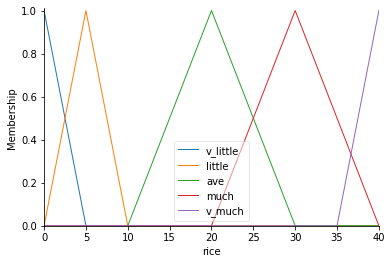

In [ ]:
from networkx import power
from networkx.algorithms.richclub import rich_club_coefficient

import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

rice  = ctrl.Antecedent(np.arange(0,41,1),'rice')
time = ctrl.Antecedent(np.arange(0,181,1),'time')
power = ctrl.Consequent(np.arange(0,101,1),'power')

rice['v_little']= fuzz.trimf (rice.universe,[0,0,5])
rice['little']= fuzz.trimf (rice.universe,[0,5,10])
rice['ave']= fuzz.trimf (rice.universe,[10,20,30])
rice['much']= fuzz.trimf (rice.universe,[20,30,40])
rice['v_much']= fuzz.trimf (rice.universe,[35,40,40])
rice.view()

time['v_fast']= fuzz.trimf (time.universe,[0,0,10])
time['fast']= fuzz.trimf (time.universe,[10,30,60])
time['ave']= fuzz.trimf (time.universe,[30,60,120])
time['slow']= fuzz.trimf (time.universe,[60,120,180])
time['v_slow']= fuzz.trimf (time.universe,[120,180,180])

power['10']= fuzz.trimf (power.universe,[10,10,20])
power['15']= fuzz.trimf (power.universe,[10,10,20])
power['20']= fuzz.trimf (power.universe,[10,10,20])
power['25']= fuzz.trimf (power.universe,[10,10,20])
power['30']= fuzz.trimf (power.universe,[10,10,20])

rule1 = ctrl.Rule (food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule (food['average'] & service['poor'],tip['less'])
rule3 = ctrl.Rule (food['poor'] & service['average'],tip['less'])
rule4 = ctrl.Rule (food['poor'] & service['good'],tip['average'])
rule5 =  ctrl.Rule (food['good'] & service['poor'],tip['average'])
rule6 = ctrl.Rule (food['average'] & service['average'],tip['average'])
rule7 = ctrl.Rule (food['good'] & service['good'],tip['much'])
rule8 = ctrl.Rule (food['good'] & service['average'],tip['much'])
rule9 = ctrl.Rule (food['average'] & service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


In [ ]:
 pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

rice  = ctrl.Antecedent(np.arange(0,41,1),'rice')
time = ctrl.Antecedent(np.arange(0,181,1),'time')
power = ctrl.Consequent(np.arange(0,101,1),'power')

rice['v_little']= fuzz.trimf (rice.universe,[0,0,5])
rice['little']= fuzz.trimf (rice.universe,[0,5,10])
rice['ave']= fuzz.trimf (rice.universe,[10,20,30])
rice['much']= fuzz.trimf (rice.universe,[20,30,40])
rice['v_much']= fuzz.trimf (rice.universe,[35,40,40])
rice.view()
power['10']= fuzz.trimf (power.universe,[10,10,20])
power['15']= fuzz.trimf (power.universe,[10,10,20])
power['20']= fuzz.trimf (power.universe,[10,10,20])
power['25']= fuzz.trimf (power.universe,[10,10,20])
power['30']= fuzz.trimf (power.universe,[10,10,20])

SyntaxError: ignored

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=749c50f42233608fc3e3af772ce4ac676b2ca7c6170bc9f8b209d81ef3c89a25
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


26.78747256139646


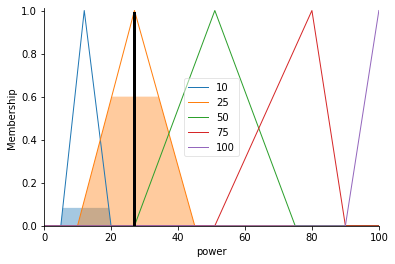

In [ ]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

rice  = ctrl.Antecedent(np.arange(0,41,1),'rice')
time = ctrl.Antecedent(np.arange(0,181,1),'time')
power = ctrl.Consequent(np.arange(0,101,1),'power')

rice['v_little']= fuzz.trimf (rice.universe,[0,0,5])
rice['little']= fuzz.trimf (rice.universe,[0,5,10])
rice['ave']= fuzz.trimf (rice.universe,[10,20,30])
rice['much']= fuzz.trimf (rice.universe,[20,30,40])
rice['v_much']= fuzz.trimf (rice.universe,[35,40,40])


time['v_fast']= fuzz.trimf (time.universe,[0,0,10])
time['fast']= fuzz.trimf (time.universe,[10,30,60])
time['ave']= fuzz.trimf (time.universe,[30,60,120])
time['slow']= fuzz.trimf (time.universe,[60,120,180])
time['v_slow']= fuzz.trimf (time.universe,[120,180,180])


power['10']= fuzz.trimf (power.universe,[5,12,20])
power['25']= fuzz.trimf (power.universe,[10,27,45])
power['50']= fuzz.trimf (power.universe,[27,51,75])
power['75']= fuzz.trimf (power.universe,[51,80,90])
power['100']= fuzz.trimf(power.universe,[90,100,100])

rule1 = ctrl.Rule (rice['v_little'] & time['v_fast'],power['75'])
rule2 = ctrl.Rule (rice['v_little'] & time['fast'],power['50'])
rule3 = ctrl.Rule (rice['v_little'] & time['ave'],power['25'])
rule4 = ctrl.Rule (rice['v_little'] & time['slow'],power['10'])
rule5 = ctrl.Rule (rice['v_little'] & time['v_slow'],power['10'])

rule6 = ctrl.Rule (rice['little'] & time['v_fast'],power['75'])
rule7 = ctrl.Rule (rice['little'] & time['fast'],power['75'])
rule8 = ctrl.Rule (rice['little'] & time['ave'],power['50'])
rule9 = ctrl.Rule (rice['little'] & time['slow'],power['25'])
rule10 = ctrl.Rule (rice['little'] & time['v_slow'],power['10'])

rule11 = ctrl.Rule (rice['ave'] & time['v_fast'],power['100'])
rule12 = ctrl.Rule (rice['ave'] & time['fast'],power['75'])
rule13 = ctrl.Rule (rice['ave'] & time['ave'],power['50'])
rule14 = ctrl.Rule (rice['ave'] & time['slow'],power['25'])
rule15 = ctrl.Rule (rice['ave'] & time['v_slow'],power['10'])

rule16 = ctrl.Rule (rice['much'] & time['v_fast'],power['100'])
rule17 = ctrl.Rule (rice['much'] & time['fast'],power['75'])
rule18 = ctrl.Rule (rice['much'] & time['ave'],power['50'])
rule19 = ctrl.Rule (rice['much'] & time['slow'],power['25'])
rule20 = ctrl.Rule (rice['much'] & time['v_slow'],power['10'])

rule21 = ctrl.Rule (rice['v_much'] & time['v_fast'],power['100'])
rule22 = ctrl.Rule (rice['v_much'] & time['fast'],power['75'])
rule23 = ctrl.Rule (rice['v_much'] & time['ave'],power['50'])
rule24 = ctrl.Rule (rice['v_much'] & time['slow'],power['25'])
rule25 = ctrl.Rule (rice['v_much'] & time['v_slow'],power['10'])

powering_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                  rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering=ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['rice']=38
powering.input['time']=125
powering.compute()
print(powering.output['power'])
power.view(sim=powering)
